In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
# Customise Descriptive Stats
from collections import OrderedDict
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Customise Descriptive Stats
from collections import OrderedDict


In [2]:
# Load dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
# Display the first few rows
df.sample(5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
17,5.1,3.5,1.4,0.3
121,5.6,2.8,4.9,2.0
4,5.0,3.6,1.4,0.2
30,4.8,3.1,1.6,0.2
25,5.0,3.0,1.6,0.2


In [3]:
# Understand the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [4]:
# Descriptive Statistics
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


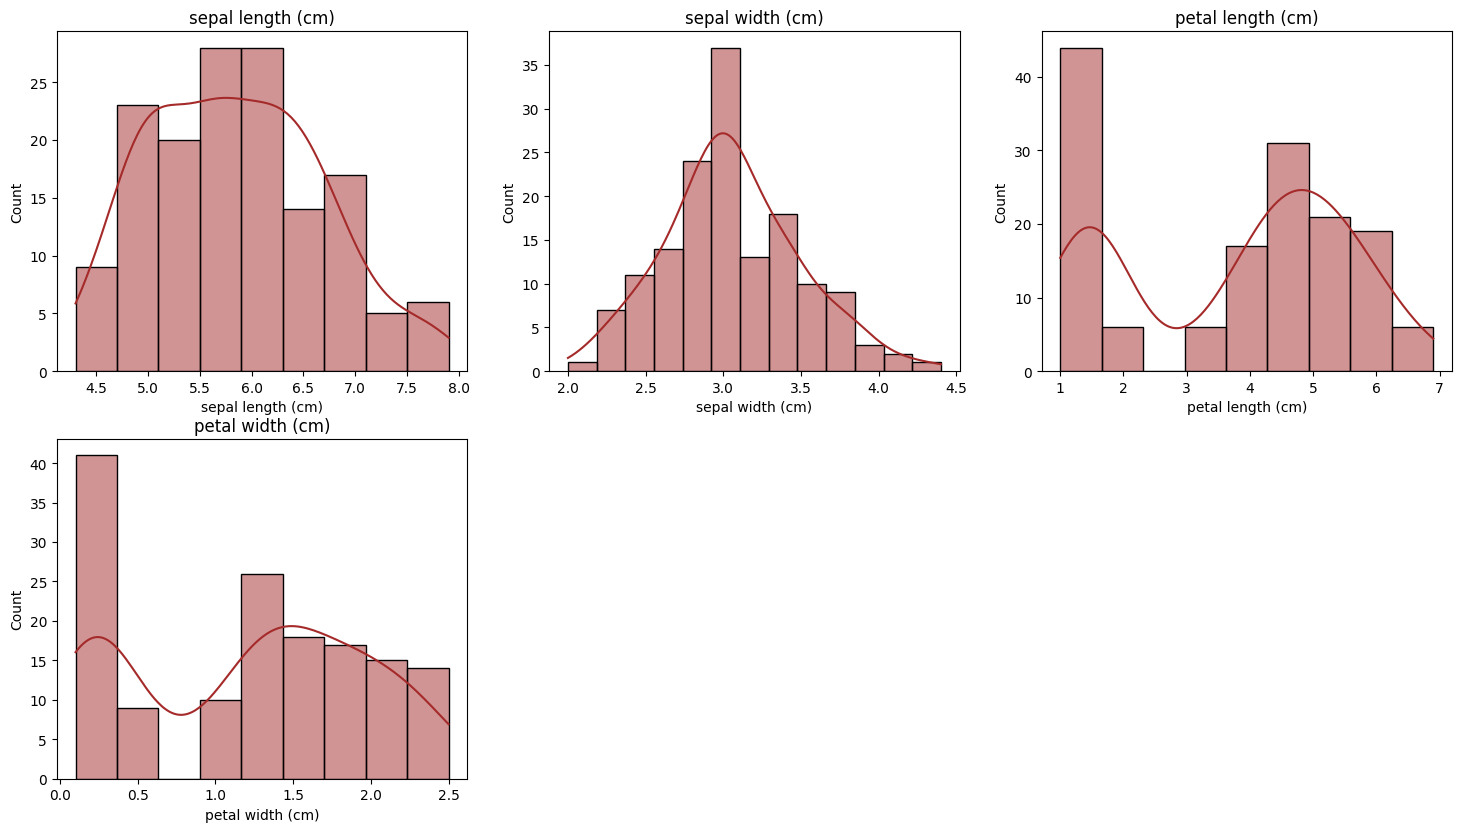

In [5]:
plt.figure(figsize=(18,15))
plot=0
for i in df.columns:
  plot+=1
  plt.subplot(3,3,plot)
  sns.histplot(df[i], kde=True, color='brown')
  plt.title(i)
plt.show()

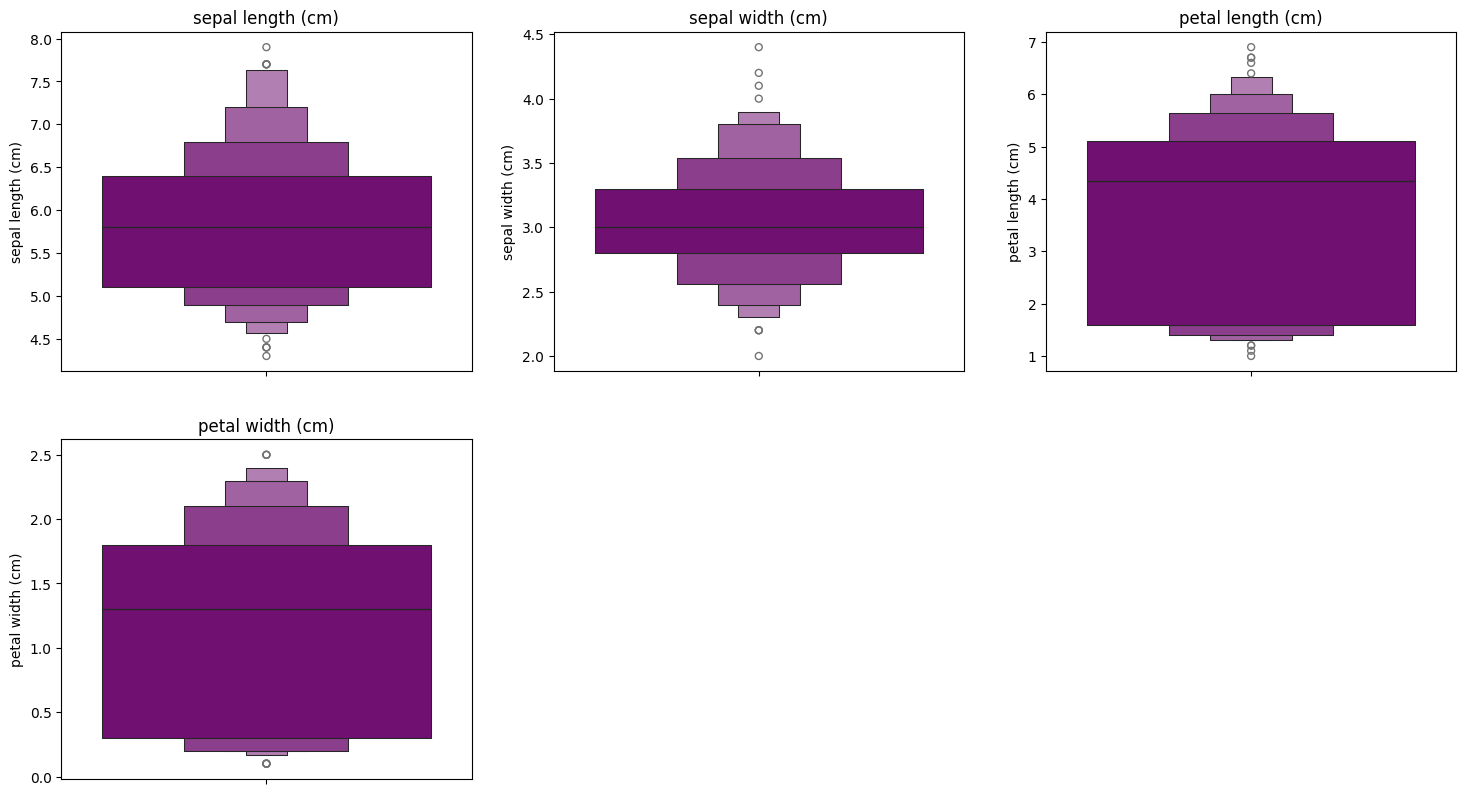

In [6]:

plt.figure(figsize=(18,15))
plot=0
for i in df.columns:
  plot+=1
  plt.subplot(3,3,plot)
  sns.boxenplot(df[i],color='purple')
  plt.title(i)
plt.show()

In [7]:

# Checkinf Colimns Names
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [8]:
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name="target")

##**Split the Dataset into Train and Test**

In [9]:
# Split dataset
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=21)

In [10]:
# Scalling Technique
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
X_train.min()

np.float64(0.0)

In [12]:

X_train.max()

np.float64(1.0)


## **Model Performance**

In [13]:
# Initialize Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


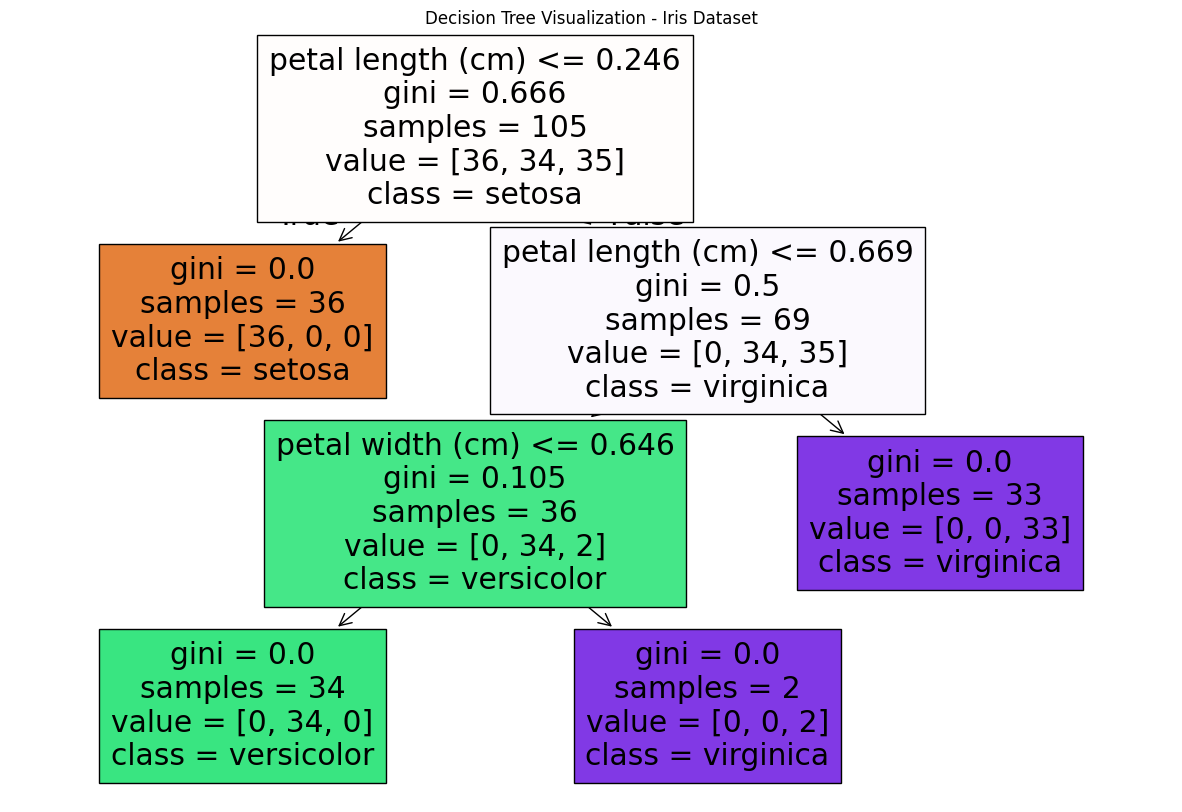

In [14]:
# Visualize the Decision Tree
plt.figure(figsize=(15,10))
plot_tree(dt_model, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.title("Decision Tree Visualization - Iris Dataset")
plt.show()


In [15]:
# Predictions
y_pred = dt_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))


Accuracy: 0.9333333333333333
Confusion Matrix:
 [[14  0  0]
 [ 0 13  3]
 [ 0  0 15]]

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       1.00      0.81      0.90        16
   virginica       0.83      1.00      0.91        15

    accuracy                           0.93        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.94      0.93      0.93        45

